# **Extras**

## **2D and 3D representation of molecules**
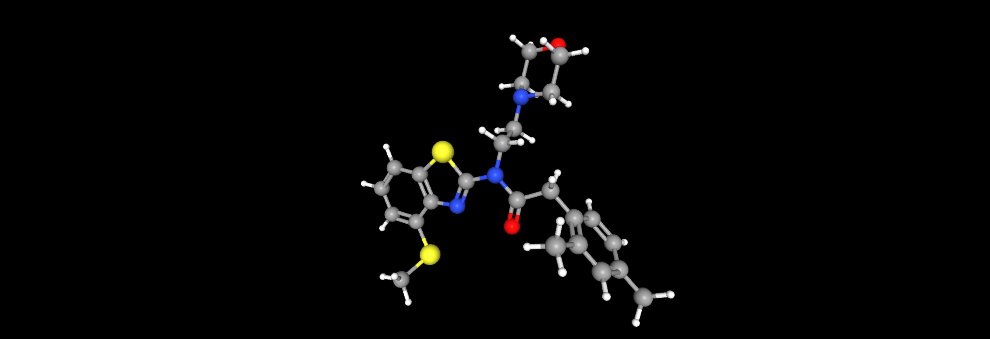

In [ ]:
# ====================================================
# Installation
# ====================================================

# Handling formulas
!conda install -y -c rdkit rdkit
!pip install cairosvg==2.5.2

# 3D
!pip install py3Dmol #https://github.com/3dmol/3Dmol.js
!pip install pubchempy #https://github.com/mcs07/PubChemPy

In [3]:
# ====================================================
# Libraries
# ====================================================

import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawOptions
from PIL import Image
import cairosvg
import cv2
from tqdm.auto import tqdm
import sys
tqdm.pandas()

import py3Dmol
from pubchempy import get_compounds, request, Compound, get_cids
IPythonConsole.ipython_useSVG = True

# ====================================================
# Data Loading
# ====================================================

df = pd.read_csv("../input/bms-molecular-translation/train_labels.csv").copy()
display(df)

# ====================================================
# Functions
# ====================================================

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

def draw_structure_2D3D(inchi, structure="3D"):
    
    mol = Chem.MolFromInchi(inchi)
    smiles = Chem.MolToSmiles(mol)
    assert inchi == Chem.MolToInchi(Chem.MolFromSmiles(smiles))
    
    if structure=="3D":
        cid_for_query = 'cid:'+str(get_cids(smiles, 'smiles')[0])

        view = py3Dmol.view(width=680, height=300, query=cid_for_query, linked=False)
        view.setStyle({'stick': {},'sphere':{'radius':0.5}})
        return view.show()
        
    else:
        return mol_with_atom_index(mol)

In [9]:
# ====================================================
# Visualization
# ====================================================

draw_structure_2D3D(df.InChI.iloc[25], structure="3D")
draw_structure_2D3D(df.InChI.iloc[25], structure="2D")